# 🧠 Intro a Neural Networks (for Absolute Beginners)

## 🎯 Goal
In Esto notebook, nosotros’ll:
- Understand what a simple **Red Neuronal** does  
- Train one a **separate two types de points**  
- See how it “thinks” visually  

Think de Esto as teaching a small **digital brain** a tell whether a dot belongs a **Group A or Group B**.

## 0️⃣ — Getting Ready: Import el Tools

Before nosotros start, nosotros need a bring in a few helper libraries:
- **numpy**: for math y arrays  
- **matplotlib**: for drawing pictures  
- **scikit-learn (sklearn)**: for creating y Entrenamiento our Red Neuronal  

In [ ]:
import piplite

In [ ]:
await piplite.install("numpy")
await piplite.install("matplotlib")
await piplite.install("scikit-learn")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Matplotlib is building the font cache; this may take a moment.


## 1️⃣ — Creating el conjunto de datos: Two “Half-Moons”

nosotros’ll make a very small, fake conjunto de datos using `make_moons()` from scikit-learn.  
It creates two curved groups de dots that look like half-moons — one blue, one orange.  

el Red Neuronal’s job: **draw an invisible line** that best separates them.

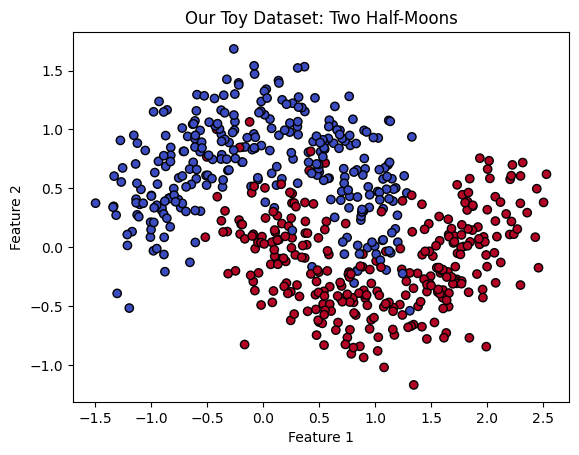

In [2]:
X, y = make_moons(n_samples=600, noise=0.25, random_state=42)

#  Split into Entrenamiento y test datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

#  Visualize el datos
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.title("Our Toy Dataset: Two Half-Moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 2️⃣ — What’s a Red Neuronal? (In Plain English)

A **Red Neuronal** es like a web de small decision-makers (neurons).  
Each neuron looks at el inputs (dot positions) y votes on what it thinks el answer es.  

- One neuron alone isn’t smart — it can only draw straight lines.  
- Together, many neurons can learn **curvy patterns**.  

nosotros’ll build one con:
- **1 hidden capa** de **8 neurons**  
- **ReLU activación** (a simple “on/off” switch)  
- **500 learning steps** a adjust its internal “knobs”

## 3️⃣ — Building y Entrenamiento el Red Neuronal

Here nosotros use:
- **StandardScaler** a make el datos easier a learn from  
- **MLPClassifier** (Multi-capa Perceptron) — our Red Neuronal modelo  
- A **Pipeline** a keep steps organized

When nosotros call `.fit()`, el modelo:
1. Looks at el Entrenamiento dots  
2. Makes guesses  
3. Learns from its mistakes (adjusts internal pesos)

In [3]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("nn", MLPClassifier(
        hidden_layer_sizes=(8,),   #  one hidden capa con 8 neurons
        activation="relu",         #  activación función
        random_state=42,
        max_iter=500               #  Entrenamiento iterations
    ))
])

model.fit(X_train, y_train)
print("✅ The model has been trained!")

✅ The model has been trained!


## 4️⃣ — How Well Did It Learn?

Let’s see how well our red performs on **unseen test datos**.  
Esto step checks if el modelo truly “understood” el pattern or just memorized examples.

nosotros’ll look at:
- **precisión**: how often it’s correct  
- **Confusion matrix**: shows right vs. wrong guesses  

Accuracy on test set: 0.873


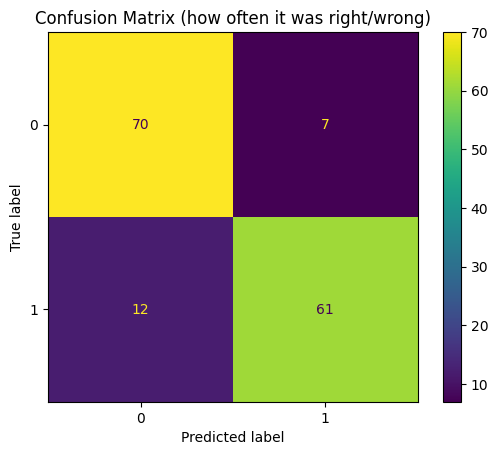

In [4]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {acc:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (how often it was right/wrong)")
plt.show()

## 5️⃣ — Seeing What It Learned: Decision Boundary

Esto part es visual y powerful — nosotros’ll see how el Red Neuronal divides el map.  
- el **background colors** show what el modelo “thinks” each region belongs a.  
- el **line between colors** es el modelo’s decision boundary.

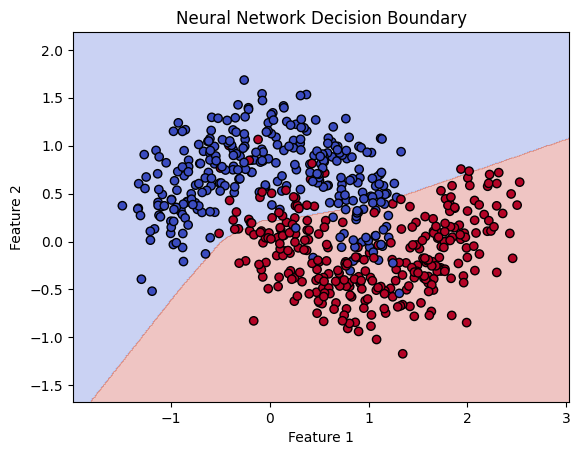

In [5]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X, y, title="Neural Network Decision Boundary")

## 6️⃣ — Experiment: Changing el red’s Size or Speed

Let’s see what happens when nosotros make el red bigger, smaller, or change how quickly it learns.

Each setup below changes:
- **Hidden capa size** (how many neurons / layers)
- **tasa de aprendizaje** (how fast it adjusts)
- **Regularization (alpha)** (keeps pesos from getting too wild)

Try them one by one — watch how el boundary changes!

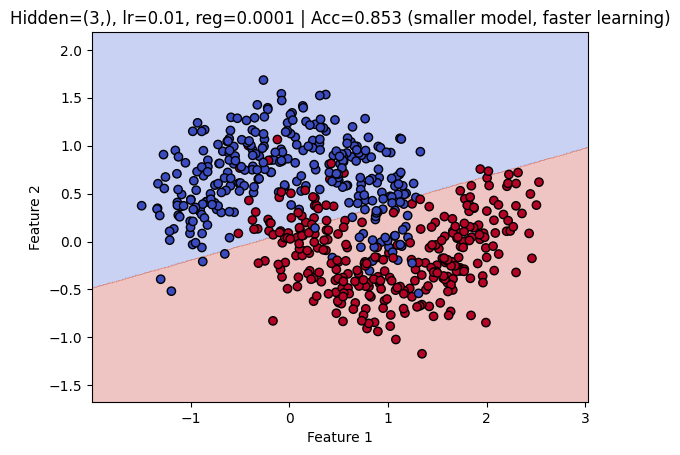

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


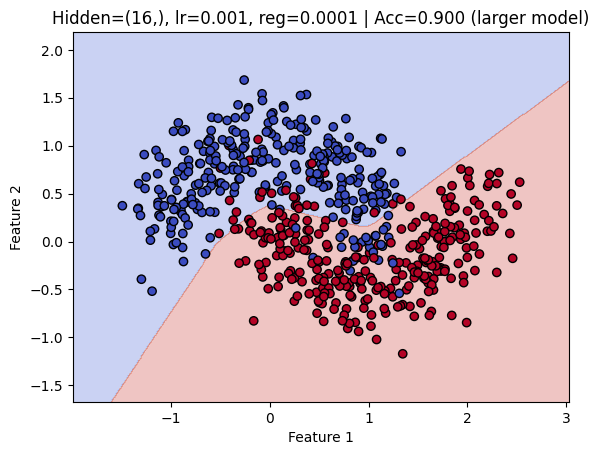

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


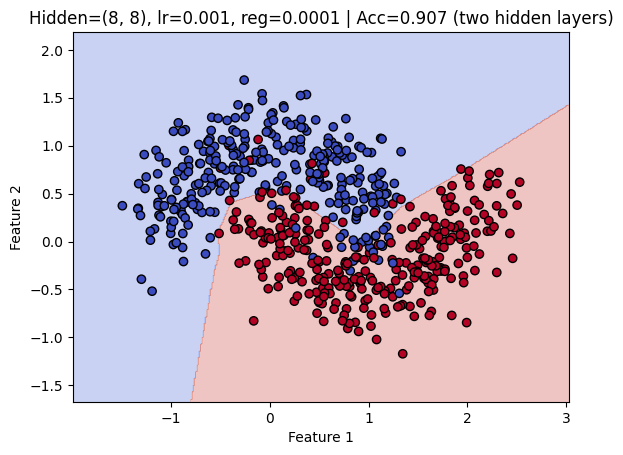

In [6]:
def train_and_plot(hidden=(4,), lr=0.001, reg=0.0001, title_extra=""):
    clf = Pipeline([
        ("scale", StandardScaler()),
        ("nn", MLPClassifier(
            hidden_layer_sizes=hidden,
            activation="relu",
            learning_rate_init=lr,
            alpha=reg,
            random_state=42,
            max_iter=500
        ))
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    plot_decision_boundary(clf, X, y, title=f"Hidden={hidden}, lr={lr}, reg={reg} | Acc={acc:.3f} {title_extra}")

train_and_plot(hidden=(3,), lr=0.01, reg=0.0001, title_extra="(smaller model, faster learning)")
train_and_plot(hidden=(16,), lr=0.001, reg=0.0001, title_extra="(larger model)")
train_and_plot(hidden=(8, 8), lr=0.001, reg=0.0001, title_extra="(two hidden layers)")

## 7️⃣ — Quick Recap

| Concept | What It Means | Analogy |
|----------|----------------|---------|
| **Neuron** | A tiny decision-maker | A single brain cell |
| **capa** | A group de neurons | A stage in thinking |
| **pesos** | Adjustable internal values | Knobs or dials |
| **activación** | When a neuron fires | el “aha!” moment |
| **Entrenamiento** | Repeated trial y error | Learning from practice |
| **Overfitting** | Memorizing examples | Student who crams y forgets |

## 8️⃣ — Optional: Try a Different conjunto de datos

Want a see Esto red on another classic conjunto de datos?  
Let’s try el **Iris conjunto de datos**, which classifies flowers.

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


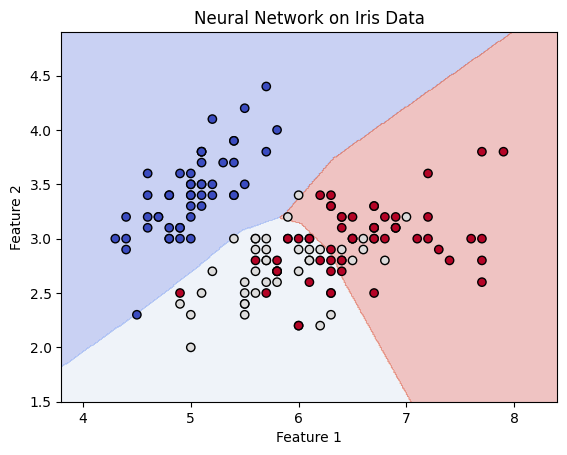

In [7]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data[:, :2], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = Pipeline([
    ("scale", StandardScaler()),
    ("nn", MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42))
])
model.fit(X_train, y_train)

plot_decision_boundary(model, X, y, title="Neural Network on Iris Data")

## 🎉 Summary

You’ve just:
- Created a **simple conjunto de datos**
- Built y trained a **Red Neuronal**
- Visualized how it **learns a separate datos**
- Experimented con different settings  

**Big takeaway:**  
Neural networks aren’t magic — they’re just many small decision-makers learning together.  
con more layers y datos, Esto same concept powers **speech recognition, image tagging, y AI chatbots**.